# Self-organizing maps (Kohonen maps)

This is a type of dimensionality reduction method. It is also a clustering method.

Things to investigate. Gradient. You are a vector. You mapped to the best-matched unit. You have 8 vectors surrounding you that can pull you in a certain direction. Look from the point of view of your best-matched unit. In which direction should you be pulled to get the minimum error distance for the vector?

Maybe a non-mathematical approach? Find the second winner and do linear regression to see where you end up.

In [5]:
import neural_dimensionality_reduction as ndr
import numpy as np

In [13]:
spikes, _ = ndr.get_spikes_data(ndr.data_dir, tetrode_id=1)
print(spikes.shape)

(62003, 4)


/nix/store/0m459gzwib59dgahny5wrpwk0v1g17sq-python3-3.7.6-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning:

Columns (11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.



In [14]:
def get_summary_statistics(spikes):
    mu = np.mean(np.mean(spikes, axis=0))
    sigma = np.mean(np.sqrt(np.mean(np.square(spikes - mu), axis=0)))
    return mu, sigma

In [15]:
mu, sigma = get_summary_statistics(spikes)
som = ndr.reduction.SelfOrganizingMap2D((32, 32, 4), mu, sigma)

In [16]:
# for i in range(spikes.shape[0]):
#     som.train1(spikes[i])

In [17]:
# ndr.plots.plot_colormap_2d(som)

In [18]:
aemodel = ndr.reduction.Autoencoder3D(4)

In [19]:
aemodel.trainBatch(spikes)

99 17877.673828125
99 17861.271484375
99 17698.025390625
99 17209.802734375
99 16697.564453125
99 16167.123046875
99 15616.9482421875
99 15051.0048828125
99 14475.021484375
99 13895.1513671875
99 13317.3779296875
99 12747.21875
99 12189.5087890625
99 11648.259765625
99 11126.5341796875
99 10626.3525390625
99 10148.6240234375
99 9693.142578125
99 9258.669921875
99 8843.1787109375
99 8444.287109375
99 8059.80615234375
99 7688.13232421875
99 7328.35009765625
99 6980.00537109375
99 6642.828125
99 6316.4873046875
99 6000.48779296875
99 5694.16552734375
99 5396.77685546875
99 5107.6201171875
99 4826.17236328125
99 4552.17431640625
99 4285.66015625
99 4026.894287109375
99 3776.287353515625
99 3534.294189453125
99 3301.325439453125
99 3077.678466796875
99 2863.49365234375
99 2658.737548828125
99 2463.213623046875
99 2276.58837890625
99 2098.45068359375
99 1928.383056640625
99 1766.0311279296875
99 1611.1763916015625
99 1463.7745361328125
99 1323.9649658203125
99 1192.049072265625


In [20]:
def color_scaling_256(X):
    mu = np.mean(X)
    sigma = np.sqrt(np.mean(np.square(X - mu)))
    zscored = ((X-mu)/sigma*64 + 128)
    
    low = np.percentile(zscored, 3)
    high = np.percentile(zscored, 97)
    
    return np.clip(zscored, 0, 254).astype('int')

def get_color_distribution_3d(transformed):
    '''
    Should be 3-dimensional
    '''
    color_transform = np.empty(transformed.shape, dtype='int')
    color_transform[:,0] = color_scaling_256(transformed[:,0])
    color_transform[:,1] = color_scaling_256(transformed[:,1])
    color_transform[:,2] = color_scaling_256(transformed[:,2])
    return np.array([ndr.plots.get_color_3d(x, y, z) for x, y, z in color_transform])

In [21]:
transformed = aemodel.transformBatch(spikes)
colors = get_color_distribution_3d(transformed)

(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb5800e610>,
       dtype=object))

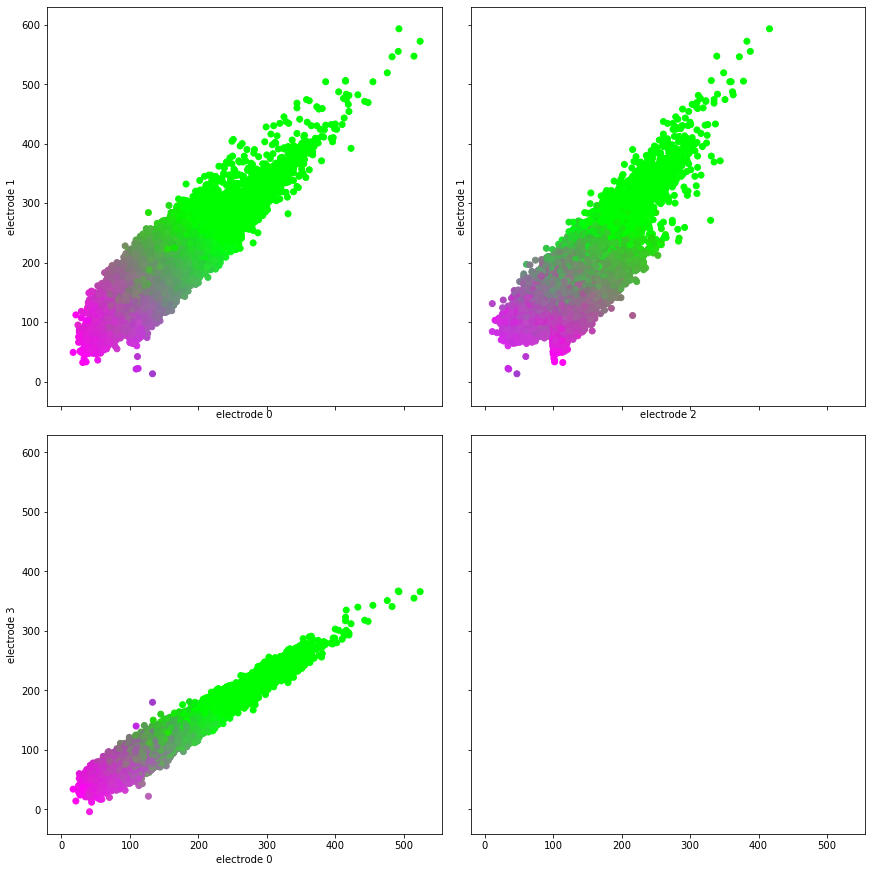

In [22]:
ndr.plots.plot_tetrode_colored(spikes, colors)

In [23]:
import plotly.express as px
import matplotlib.pyplot as plt

Text(0.5, 0, 'color scaled')

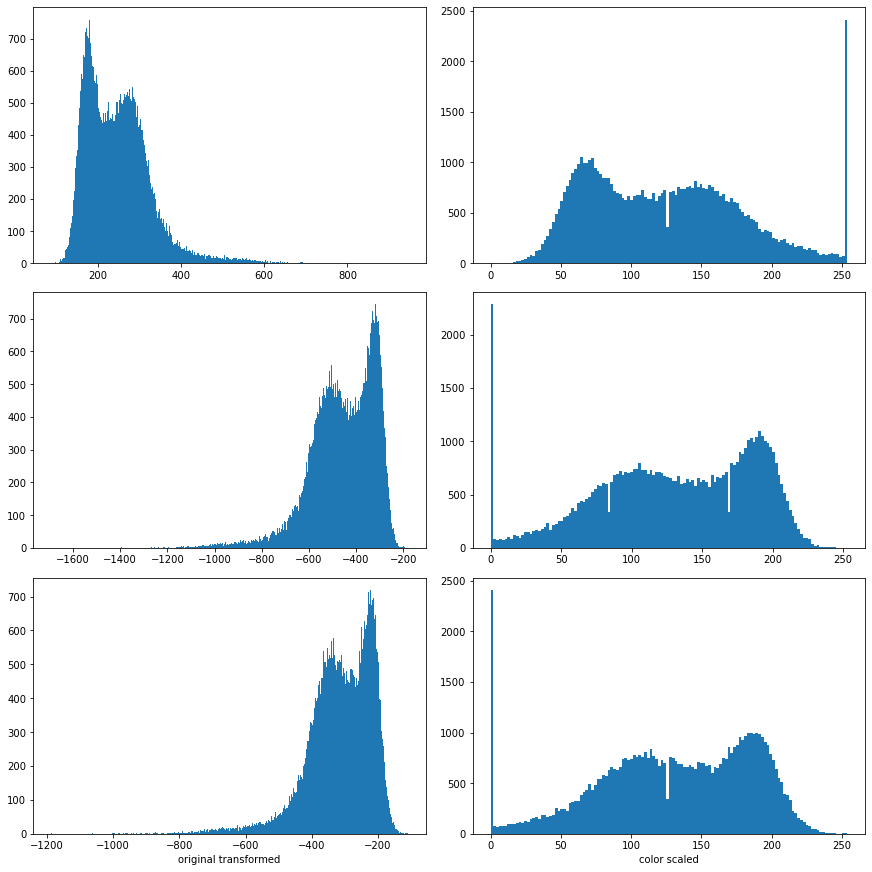

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)

axes[0, 0].hist(x=transformed[:,0], bins=500)

axes[1, 0].hist(x=transformed[:,1], bins=500)
axes[2, 0].hist(x=transformed[:,2], bins=500)
axes[2, 0].set_xlabel('original transformed')

axes[0, 1].hist(x=color_scaling_256(transformed[:,0]), bins=128)
axes[1, 1].hist(x=color_scaling_256(transformed[:,1]), bins=128)
axes[2, 1].hist(x=color_scaling_256(transformed[:,2]), bins=128)
axes[2, 1].set_xlabel('color scaled')